In [12]:
import random
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [13]:
%run ./func.ipynb

In [14]:
D, J = 100,100

# a side of the grid
num_rows_columns = 50
demand_points, candidate_sites = generate_instance(num_rows_columns, D, J, seed=42)

print("Demand Points:")
print(demand_points)

print("\nCandidate Sites:")
print(candidate_sites)

Demand Points:
[(36, 18), (9, 18), (44, 10), (46, 8), (25, 24), (22, 16), (35, 49), (11, 35), (29, 36), (42, 45), (24, 1), (31, 12), (43, 9), (39, 22), (26, 33), (4, 34), (22, 3), (11, 38), (12, 34), (33, 25), (11, 5), (35, 36), (9, 16), (48, 10), (50, 22), (49, 35), (30, 35), (19, 49), (17, 38), (29, 42), (39, 48), (1, 1), (36, 4), (12, 50), (47, 22), (17, 22), (11, 19), (48, 31), (48, 23), (38, 20), (36, 24), (47, 7), (1, 4), (16, 43), (2, 25), (32, 20), (9, 42), (43, 17), (26, 50), (6, 25), (38, 40), (46, 21), (14, 40), (7, 46), (22, 26), (5, 37), (41, 46), (27, 19), (41, 6), (42, 22), (10, 33), (7, 35), (21, 26), (19, 28), (17, 46), (27, 38), (39, 24), (21, 27), (38, 19), (3, 40), (15, 9), (8, 25), (16, 25), (43, 11), (41, 44), (48, 35), (3, 19), (16, 4), (15, 14), (2, 42), (4, 33), (18, 27), (32, 23), (9, 38), (39, 14), (39, 3), (20, 44), (28, 6), (4, 21), (36, 23), (4, 44), (43, 26), (6, 23), (12, 27), (16, 21), (36, 48), (47, 42), (47, 3), (20, 33), (34, 16)]

Candidate Sites:
[

In [15]:
alpha = 0
beta = 0.1

p = 20
r = 20

h_i = np.full(D, 1 / D)

# 既存のリーダーの施設セット J_L を仮定
J_L = {}  # インデックスとして候補施設の一部を選択
J_F = {}

In [16]:
distances = compute_distances(demand_points, candidate_sites)
print("\nDistances:", distances)

# w_ij の計算
wij_matrix = compute_wij_matrix(distances, alpha, beta)
print("\nw_ij Matrix:", wij_matrix)

# U_i^L の計算
Ui_L = compute_Ui_L(wij_matrix, J_L)
print("\nU_i^L:", Ui_L)

# U_i^F の計算
Ui_F = compute_Ui_F(wij_matrix, J_F)
print("\nU_i^F:", Ui_F)


Distances: [[32.44996148  4.12310563 23.70653918 ...  5.09901951 22.627417
  24.18677324]
 [28.46049894 31.01612484 26.40075756 ... 32.01562119 19.41648784
   4.24264069]
 [43.60045871  9.8488578  34.66987165 ...  7.61577311 33.9411255
  32.38826948]
 ...
 [51.03920062 17.4642492  42.19004622 ... 15.23154621 41.10960958
  37.        ]
 [12.16552506 24.41311123  7.81024968 ... 26.40075756  1.
  19.6977156 ]
 [33.12099032  6.70820393 24.69817807 ...  7.07106781 22.8035085
  22.02271555]]

w_ij Matrix: [[0.03896871 0.66211861 0.09341962 ... 0.60055446 0.10406478 0.08903931]
 [0.05807326 0.04497662 0.07135586 ... 0.04069858 0.14346721 0.65425109]
 [0.0127778  0.37348188 0.03121092 ... 0.46692935 0.03357033 0.03920986]
 ...
 [0.00607289 0.17439631 0.01471328 ... 0.21802302 0.01639201 0.02472353]
 [0.29624973 0.08704665 0.4579364  ... 0.07135586 0.90483742 0.13948872]
 [0.03643961 0.51128895 0.08460027 ... 0.49306869 0.10224833 0.11055175]]

U_i^L: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [17]:
#SEED = 422
#np.random.seed(SEED)

x0 = np.random.rand(len(candidate_sites))  # 例: 初期値
y0 = np.random.rand(len(candidate_sites))  # 同じ次元

In [18]:
x_opt, y_opt, history = lgda_solver(
    x0, y0,
    wij_matrix, Ui_L, Ui_F, h_i,
    p, r,
    eta_x=0.01, eta_y=0.01,
    mu=1.3,
    max_iter=1000,
    tau_interval=50,
    return_history=True
)

In [19]:
print("\nOptimal x:", x_opt)
print("Optimal y:", y_opt)
print("\nHistory of dx:", history["dx"])
print('objective:', history["objective"][-1])
print("num of iter:", len(history["objective"]))


Optimal x: [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0.]
Optimal y: [1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0.]

History of dx: [4.6666613  5.83095189 5.83095189 5.83095189 5.83095189 5.83095189
 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189
 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189
 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189
 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189 5.83095189
 5.83095189 5.

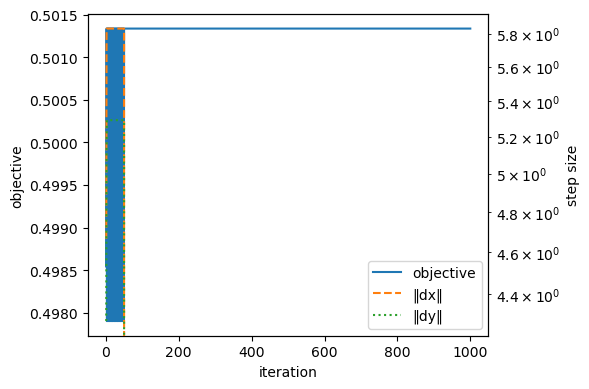

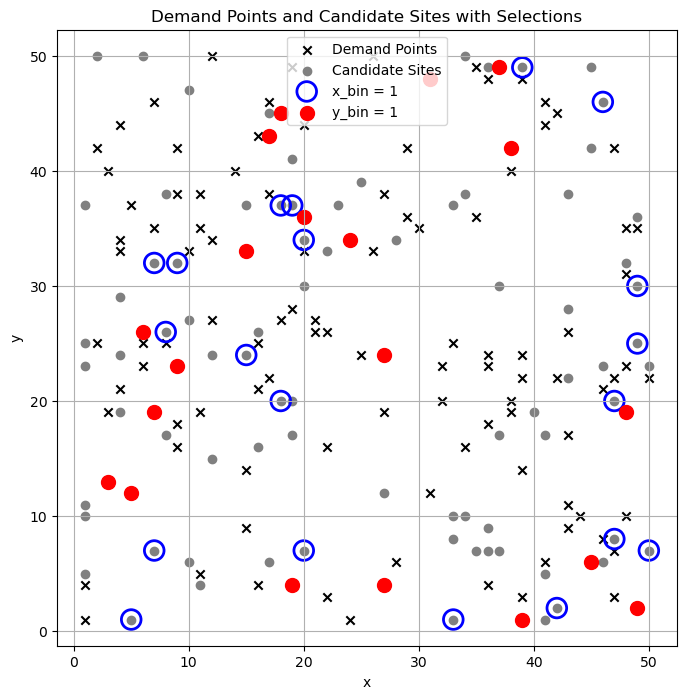

In [20]:
plot_minmax_history(history["objective"], history["dx"], history["dy"], logy=True)
plot_facility_selection(candidate_sites, demand_points, x_opt, y_opt)

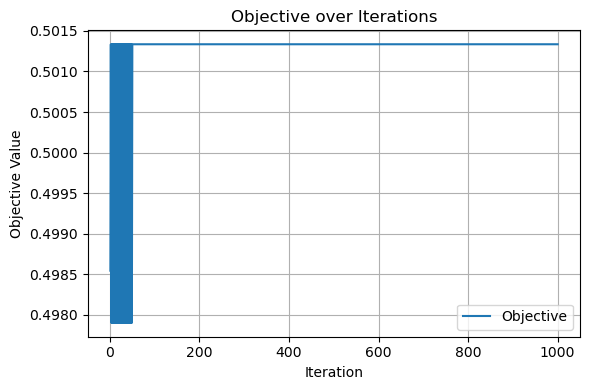

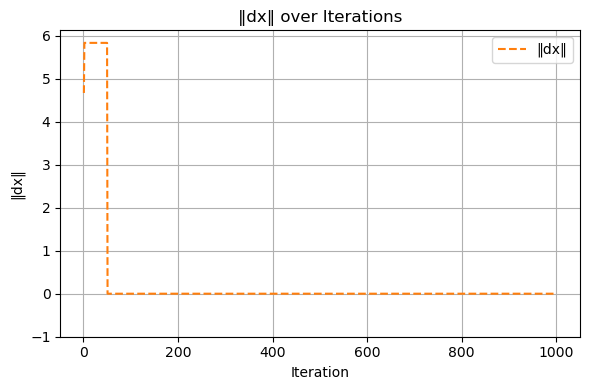

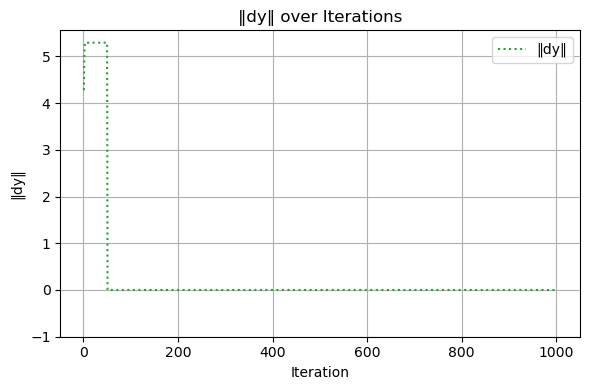

In [21]:
plot_each_history_component_separately(history)

In [22]:
'''
create_history_evolution_gif(
    x0=x0,
    y0=y0,
    wij_matrix_fn=lambda alpha, beta: compute_wij_matrix(distances, alpha, beta),
    Ui_L=Ui_L,
    Ui_F=Ui_F,
    h_i=h_i,
    p=p,
    r=r,
    fixed_param='alpha',
    fixed_value=0.01,
    var_range=np.linspace(0.001, 2.0, 100),
    filename="varying_mu.gif",
    eta_x=0.01,
    eta_y=0.01,
    mu=0.01,
    max_iter=1000,
    tau_interval=50,
    logy=False,
    mode="mu"
)
'''

'\ncreate_history_evolution_gif(\n    x0=x0,\n    y0=y0,\n    wij_matrix_fn=lambda alpha, beta: compute_wij_matrix(distances, alpha, beta),\n    Ui_L=Ui_L,\n    Ui_F=Ui_F,\n    h_i=h_i,\n    p=p,\n    r=r,\n    fixed_param=\'alpha\',\n    fixed_value=0.01,\n    var_range=np.linspace(0.001, 2.0, 100),\n    filename="varying_mu.gif",\n    eta_x=0.01,\n    eta_y=0.01,\n    mu=0.01,\n    max_iter=1000,\n    tau_interval=50,\n    logy=False,\n    mode="mu"\n)\n'